In [9]:
import pandas as pd
df=pd.read_csv("/content/news.csv")
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


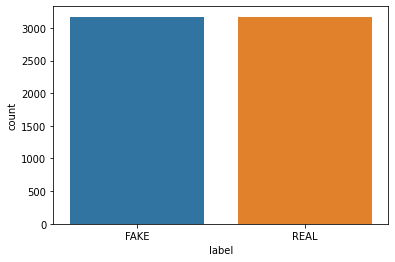

In [25]:
import seaborn as sns
sns.countplot(df['label'])


In [10]:
x=df.iloc[:,-2].values
y=df.iloc[:,-1].values

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words='english')
x_train_vect= vect.fit_transform(x_train)
x_test_vect = vect.transform(x_test)

In [13]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_train_vect,y_train)
y_pred=model.predict(x_test_vect)
y_pred

array(['REAL', 'FAKE', 'FAKE', ..., 'REAL', 'FAKE', 'FAKE'], dtype=object)

<BarContainer object of 1584 artists>

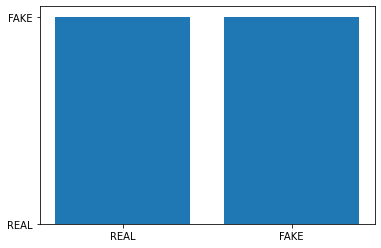

In [14]:
import matplotlib.pyplot as plt
plt.bar(y_test,y_pred)

In [9]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[717,  50],
       [165, 652]])

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8642676767676768

In [13]:
from sklearn.pipeline import make_pipeline
model2=make_pipeline(CountVectorizer(),SVC())
model2.fit(x_train,y_train)
y_pred2=model2.predict(x_test)
accuracy_score(y_pred2,y_test)

0.8383838383838383

In [14]:
from sklearn.naive_bayes import MultinomialNB
model3=MultinomialNB()
model3.fit(x_train_vect,y_train)
y_pred3=model.predict(x_test_vect)
accuracy_score(y_pred3,y_test)

0.8642676767676768

In [16]:
model4=make_pipeline(CountVectorizer(),MultinomialNB())
model4.fit(x_train,y_train)
y_pred4=model4.predict(x_test)
accuracy_score(y_pred4,y_test)

0.8781565656565656

In [17]:
import joblib
text_model=joblib.dump(model4,'FAKE-REAL')

In [18]:
text_model=joblib.load('FAKE-REAL')


In [22]:
text_model.predict(['india won world cup'])

array(['FAKE'], dtype='<U4')

In [23]:
pip install streamlit--queit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.1 MB 5.2 MB/s 
     |████████████████████████████████| 111 kB 56.8 MB/s 
     |████████████████████████████████| 77 kB 5.7 MB/s 
     |████████████████████████████████| 4.3 MB 46.3 MB/s 
     |████████████████████████████████| 164 kB 65.9 MB/s 
     |████████████████████████████████| 181 kB 46.0 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
     |████████████████████████████████| 131 kB 55.0 MB/s 
     |████████████████████████████████| 793 kB 55.6 MB/s 
     |████████████████████████████████| 130 kB 55.6 MB/s 
     |████████████████████████████████| 428 kB 59.3 MB/s 
     |████████████████████████████████| 381 kB 54.5 MB/s 
  Created wheel for blinker: filename=blinker-1.4-py3-none-any.whl size=13478 sha256=23e3af321cc9dbde075d8b30e201083e3350fe35eea4c183eb1780818a461671
  Stored in directory: /root/.cache/pip/wheels/22/f5/18/df7

In [6]:
%%writefile app.py 
import streamlit as st 
import joblib 

st.title("SPAM HAM CLASSIFIER")   
text_model = joblib.load('/content/FAKE-REAL')  
news = st.text_input("Enter the message :")   
output = text_model.predict([news])                 
if st.button('PREDICT'):                     
  st.title(output[0])

Overwriting app.py


In [7]:
!streamlit run app.py &npx localtunnel --port 8501

2022-06-02 10:42:50.867 INFO    numexpr.utils: NumExpr defaulting to 2 threads.
npx: installed 22 in 2.416s
your url is: https://great-women-cheer-34-75-180-5.loca.lt

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://34.75.180.5:8501

  Stopping...
^C
